<>:27: SyntaxWarning: invalid escape sequence '\.'
<>:27: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Antonio\AppData\Local\Temp\ipykernel_5708\1007623512.py:27: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


Leyendo imágenes de C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Incendios 1
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Inundaciones 4568
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Tornados 1364
Directorios leídos: 3
Imágenes en cada directorio: [4569, 1364, 1895]
Suma total de imágenes en subdirectorios: 7828
Cantidad de etiquetas creadas: 7828
0 Incendios
1 Inundaciones
2 Tornados


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       157,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,723 (620.01 KB)

 Trainable params: 158,723 (620.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4111 - loss: 1.0913 - val_accuracy: 0.5682 - val_loss: 0.9904
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5725 - loss: 0.9940 - val_accuracy: 0.5682 - val_loss: 0.9355
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6208 - loss: 0.9464 - val_accuracy: 0.6425 - val_loss: 0.8755
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6681 - loss: 0.8947 - val_accuracy: 0.8029 - val_loss: 0.8082
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6989 - loss: 0.8358 - val_accuracy: 0.8228 - val_loss: 0.7405
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7428 - loss: 0.7719 - val_accuracy: 0.8228 - val_loss: 0.6775
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7387 - loss: 0.7485 - val_accuracy: 0.8228 - val_loss: 0.6233
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7809 - loss: 0.6792 - val_accuracy: 0.8228 - v

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.2743


Test loss: 0.2751631736755371
Test accuracy: 0.8876117467880249


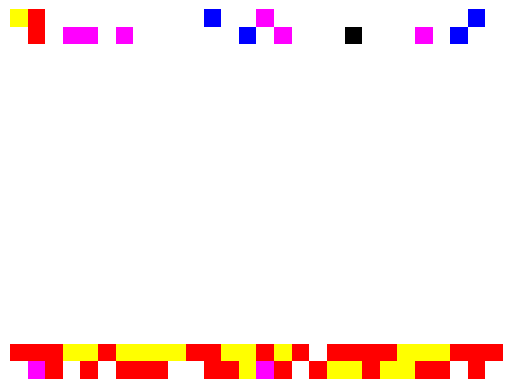

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


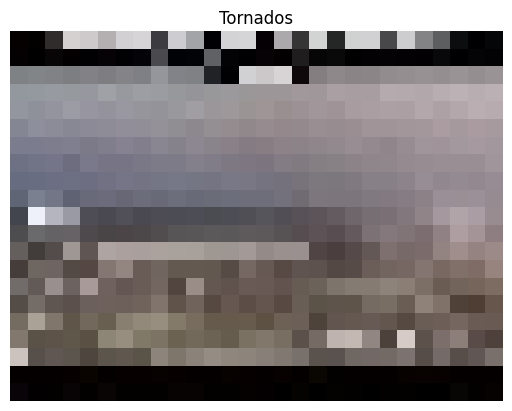

In [3]:
import cv2
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from skimage.transform import resize

def load_data():
    imgpath = 'C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img'
    images = []
    directories = []
    dircount = []
    prevRoot = ''
    cant = 0

    print("Leyendo imágenes de", imgpath)

    for root, dirnames, filenames in os.walk(imgpath):
        for filename in filenames:
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                cant += 1
                filepath = os.path.join(root, filename)
                image = plt.imread(filepath)
                if len(image.shape) == 3:
                    images.append(image)
                b = "Leyendo..." + str(cant)
                print(b, end="\r")
                if prevRoot != root:
                    print(root, cant)
                    prevRoot = root
                    directories.append(root)
                    dircount.append(cant)
                    cant = 0
    dircount.append(cant)

    dircount = dircount[1:]
    dircount[0] = dircount[0] + 1
    print('Directorios leídos:', len(directories))
    print("Imágenes en cada directorio:", dircount)
    print('Suma total de imágenes en subdirectorios:', sum(dircount))

    labels = []
    indice = 0
    for cantidad in dircount:
        for _ in range(cantidad):
            labels.append(indice)
        indice += 1
    print("Cantidad de etiquetas creadas:", len(labels))

    deportes = []
    indice = 0
    for directorio in directories:
        name = directorio.split(os.sep)
        print(indice, name[len(name) - 1])
        deportes.append(name[len(name) - 1])
        indice += 1

    y = np.array(labels)
    X = np.array(images, dtype=np.uint8)

    train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2)
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    train_X /= 255.
    test_X /= 255.

    train_Y_one_hot = to_categorical(train_Y)
    test_Y_one_hot = to_categorical(test_Y)

    train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

    nClasses = len(deportes)

    return train_X, test_X, train_label, test_Y_one_hot, valid_X, valid_label, nClasses, deportes


def build_model(input_shape, nClasses):
    INIT_LR = 1e-3
    epochs = 20
    batch_size = 64

    sport_model = Sequential()
    sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=input_shape))
    sport_model.add(LeakyReLU(alpha=0.1))
    sport_model.add(MaxPooling2D((2, 2), padding='same'))
    sport_model.add(Dropout(0.5))
    sport_model.add(Flatten())
    sport_model.add(Dense(32, activation='linear'))
    sport_model.add(LeakyReLU(alpha=0.1))
    sport_model.add(Dropout(0.5))
    sport_model.add(Dense(nClasses, activation='softmax'))
    sport_model.summary()

    optimizer = tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100)
    sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return sport_model


def train_model(model, train_X, train_label, valid_X, valid_label, batch_size, epochs):
    sport_train = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))
    return sport_train


def evaluate_model(model, test_X, test_Y_one_hot):
    test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])
    return test_eval


def predict_image(image_path, model, deportes):
    image = plt.imread(image_path)
    image_resized = resize(image, (21, 28), anti_aliasing=True, preserve_range=True)

    plt.imshow(image_resized)
    plt.axis('off')
    plt.show()

    image_resized = image_resized.astype('float32') / 255.
    image_resized = np.expand_dims(image_resized, axis=0)

    predicted_class = np.argmax(model.predict(image_resized), axis=-1)[0]
    predicted_class_name = deportes[predicted_class]

    plt.imshow(image_resized[0])
    plt.title(predicted_class_name)
    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    train_X, test_X, train_label, test_Y_one_hot, valid_X, valid_label, nClasses, deportes = load_data()
    input_shape = train_X.shape[1:]

    model = build_model(input_shape, nClasses)
    sport_train = train_model(model, train_X, train_label, valid_X, valid_label, batch_size=64, epochs=20)
    model.save("ccn.h5")

    test_eval = evaluate_model(model, test_X, test_Y_one_hot)

    predict_image('C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/View/Img', model, deportes)
